In [1]:
# 讀取 CSV File
# Read the data into a data frame.
import pandas as pd
df = pd.read_csv('../2018-chienyeh_utf8.csv') 
df.head()

,銷貨倉,銷貨日期,銷貨次數,序號,銷貨時間,銷售金額,客戶代號,性別,藥品代號,藥品名稱,...,說明,等級,原價,折扣率,交易後庫存量,售價,銷售量,銷售額,折扣金,發票
0,09,2018/1/1,10001,1001,10:23:00,2500,0919323538,女,009571,作預付2500元-全身芳療舒壓課程-09倉 ...,...,作新預收醫美課程(原861之1-11次,A,2500,100,20,2500.0,1,2500,0,
1,13,2018/1/1,10001,1001,12:52:52,2574,572,女,4710050921359,KB99無子大葡萄乾300G ...,...,有機食品,C,99,100,3,74.3,1,74,0,
2,03,2018/1/1,10001,1001,08:58:08,2824,C01,,4715168110572,永信后保寧1.5MG(事後)1錠入 ...,...,避孕藥,A,250,100,0,250.0,1,250,0,
3,05,2018/1/1,10001,1001,11:20:48,2849,E01,男,4716022950143,防疫天使嬰幼童口罩5入(綠.藍) ...,...,口眼罩貼,A,25,100,17,25.0,1,25,0,ˇ
4,18,2018/1/1,10001,1001,09:00:34,2948,0933131405,男,4901548160132,暖暖包24H 日本桐灰(小白兔)10入 ...,...,冰熱枕包,E,99,100,135,99.0,1,99,0,ˇ


In [5]:
def filter():
    global df
    
    ## delete column['類別代號'] = 998 cause it means refund of the product
    df = df[df['類別代號'] != '998\x1c']

filter()

In [2]:
df_tmp = df.groupby('藥品代號')
df_drugID = df_tmp.groups.keys()

df_count = pd.DataFrame(index=df_drugID ,columns=['count'])

solution = pd.DataFrame()
solution = df.groupby('藥品代號').count();

for i in df_drugID:
    df_count.at[i,'count'] = solution.loc[i,'序號']

df_count.head()

,count
,38
471175351325,246
471395706989,1
471985394610,2
+H109681827,4


In [3]:
df_count_sorting = df_count.sort_values(by = 'count',ascending = False)
print(df_count_sorting)

                count
DPS4           41838
DRUG FARE      11966
DPS3            9156
000501          7348
DPSY            7296
...               ...
AB289211G0         1
AB29478100         1
2565886890421      1
AB301221G0         1
4714421806221      1

[13077 rows x 1 columns]


In [4]:
solution = df
solution['銷貨日期'] = pd.to_datetime(solution['銷貨日期'])
solution = solution.set_index('銷貨日期')

solution.resample('MS').sum().head()

,銷貨次數,序號,銷售金額,原價,折扣率,交易後庫存量,售價,銷售量,銷售額,折扣金
銷貨日期,,,,,,,,,,
2018-01-01,963264997,96196041,126431605,24045789,4940381,9801422,22979263.6,74008,12600278,844229
2018-02-01,890266278,88903329,114706041,21797417,4577440,10347585,20615427.2,86964,11827624,703520
2018-03-01,963946222,96070193,127230337,29098545,4887514,6146209,28127885.1,97845,12860555,841463
2018-04-01,960417718,95737335,338703740,41247251,5114180,25396789,39531393.3,97138,24403989,685618
2018-05-01,1024645342,102082952,281757491,38367798,5281237,16376828,37183557.7,100889,21591304,807427


In [5]:
solution = df

solution['銷貨日期'] = pd.to_datetime(solution['銷貨日期'])
solution = solution.set_index(['藥品代號','銷貨日期'])

solution = solution.groupby(['藥品代號','銷貨日期'])

#solution.resample('MS').count().head()

solution.sum().head()

銷貨次數    序號  銷售金額  原價  折扣率  交易後庫存量   售價  銷售量  銷售額  \
藥品代號           銷貨日期                                                            
             
 2018-01-05  30001  3001   551   0  100       0  0.0    1    0   
               2018-01-09  60004  6004  1752   0  200       0  0.0    2    0   
               2018-03-21  20009  2001   540   0  100       0  0.0    1    0   
               2018-03-23  20012  2001  2500   0  100       0  0.0    1    0   
               2018-03-24  10018  1001     0   0  100       0  0.0    1    0   

                           折扣金  
藥品代號           銷貨日期             
             
 2018-01-05    0  
               2018-01-09    0  
               2018-03-21    0  
               2018-03-23    0  
               2018-03-24    0

In [6]:
#觀看藥品每個月份的銷售量
solution = df


for i in solution.index:
    if solution.loc[i, '銷售量']<0:
        solution.loc[i, '銷售量'] = abs(solution.loc[i, '銷售量'])

solution['銷貨日期'] = pd.to_datetime(solution['銷貨日期'])
solution = solution.set_index('銷貨日期')
solution = solution.groupby('藥品代號')


sale_month = solution.resample('MS').sum()
sale_month.head(36)

銷貨次數      序號    銷售金額    原價   折扣率  交易後庫存量  \
藥品代號           銷貨日期                                                      
             
 2018-01-01    90005    9005    2303     0   300       0   
               2018-02-01        0       0       0     0     0       0   
               2018-03-01    60057    6012    5374     0   400       0   
               2018-04-01    60007    6003   22864     0   300       0   
               2018-05-01    40017    4005    5330     0   200       0   
               2018-06-01    90028    9004    2740     0   300       0   
               2018-07-01   140024   14022   29091     0   600       0   
               2018-08-01    30011    3003    2590     0   100       0   
               2018-09-01    40009    4006    5268     0   200       0   
               2018-10-01    60023    6006    2668     0   200       0   
               2018-11-01   110021   11010   84710     0   500       0   
               2018-12-01   150032   15009   11383     0   600       0   
 471175351325
 2018-01-01   661040   66448   62712  3005  3600     877   
               2018-02-01   320517   31346   42070     0  1800    -191   
               2018-03-01   410833   41293   91609  3004  2900     378   
               2018-04-01   570676   57247  333344  2000  3500    -236   
               2018-05-01  1241561  123483  278640  6524  5900    -169   
               2018-06-01   120276   12097    9287     4   600    -121   
               2018-07-01   180152   18060   44970     4  1100      -7   
               2018-08-01   300172   30055   22590     2  1300    -105   
               2018-09-01   180158   18019   18080     0   800     -11   
               2018-10-01   260326   26082   40695     0  1285    -783   
               2018-11-01   160186   16050   16393     0   900   -1167   
               2018-12-01    90156    9029     902     0   500      50   
 471395706989
 2018-11-01    10001    1001    2752     0   100      -1   
 471985394610
 2018-07-01    20008    2003    4070     0   200      -1   
+H109681827  
 2018-06-01    30080    3019    4453   330   300     -22   
               2018-07-01        0       0       0     0     0       0   
               2018-08-01        0       0       0     0     0       0   
               2018-09-01    30001    3001     130   130   100      -1   
+H4440050830 
 2018-06-01    20192    2047      15    30   200      -5   
               2018-07-01    10029    1010     465    15   100      -1   
,            
 2018-01-01    10005    1002    4234     0   100       0   
.            
 2018-01-01    60070    6013   18245     5   500       0   
               2018-02-01    70145    7029   25829     0   580       0   
               2018-03-01    80071    7073    4209     0   400       0   

                               售價  銷售量  銷售額  折扣金  
藥品代號           銷貨日期                               
             
 2018-01-01     0.0    3    0    0  
               2018-02-01     0.0    0    0    0  
               2018-03-01     0.0    4    0    0  
               2018-04-01     0.0    3    0    0  
               2018-05-01     0.0    2    0    0  
               2018-06-01     0.0    3    0    0  
               2018-07-01     0.0    6    0    0  
               2018-08-01     0.0    1    0    0  
               2018-09-01     0.0    2    0    0  
               2018-10-01     0.0    2    0    0  
               2018-11-01     0.0    5    0    0  
               2018-12-01     0.0    6    0    0  
 471175351325
 2018-01-01  3005.0   36    0    1  
               2018-02-01     0.0   18    0    0  
               2018-03-01  2504.0   31    0    0  
               2018-04-01  2000.0   38    0    0  
               2018-05-01  5524.0   66  500    0  
               2018-06-01     4.0    6   -1    1  
               2018-07-01     4.0   12    0    0  
               2018-08-01     0.0   15    0    0  
               2018-09-01     0.0    9    0    0  
               2018-10-01     0.0  317    0 

In [7]:
#觀看藥品年度總銷售排名
solution = df

for i in solution.index:
    if solution.loc[i, '銷售量']<0:
        solution.loc[i, '銷售量'] = abs(solution.loc[i, '銷售量'])

solution = solution.groupby('藥品代號')
solution.sum().sort_values(by = '銷售量', ascending = False).head(25)

,銷貨次數,序號,銷售金額,原價,折扣率,交易後庫存量,售價,銷售量,銷售額,折扣金
藥品代號,,,,,,,,,,
050000,13924950,1384306,5381372,1101,110603,-88934652,17381.0,310241,53865,1000
777,19664699,1929836,3694335,2515,126303,-2111750,1505625.3,250985,2607,1011
NC033541G0,1033727,104579,383568,448,5200,-490090,170.5,133427,161610,4000
000100,54068555,5358508,59910128,319599,318800,193389108,320298.0,92173,-8060848,48
DPSZ,160189,16027,75308,8,1000,-3,8.0,51320,0,51318
DPS4,895407715,89403651,220286950,114048701,4183800,-25,114048701.0,41839,11823514,1800
AC24375100,70265,7105,60371,48,400,-63092,6.0,40089,52500,0
AC41316100,370641,37206,163630,64,2500,-23690,65.8,37796,30531,0
BC23016100,1924529,191498,253998,654,11300,11110,538.5,31445,63001,150


In [8]:
import matplotlib.pyplot as plt



#solution = pd.DataFrame(columns = ['銷貨日期','銷售量'])
#sale_month.loc[('471175351325',slice(None)),:]
#df2.loc[('语文',slice(None)),:]


sale_month.index.get_level_values('藥品代號').unique().tolist()





['             \x1c',
 ' 471175351325\x1c',
 ' 471395706989\x1c',
 ' 471985394610\x1c',
 '+H109681827  \x1c',
 '+H4440050830 \x1c',
 ',            \x1c',
 '.            \x1c',
 '000000       \x1c',
 '0000000231062\x1c',
 '0000000821001\x1c',
 '0000000821002\x1c',
 '0000000821003\x1c',
 '0000047109605\x1c',
 '0000047164048\x1c',
 '00000505     \x1c',
 '000100       \x1c',
 '000102       \x1c',
 '000103       \x1c',
 '00020        \x1c',
 '0002345709990\x1c',
 '000250       \x1c',
 '000300       \x1c',
 '000397       \x1c',
 '000399       \x1c',
 '0003990      \x1c',
 '0003993      \x1c',
 '000400       \x1c',
 '0004001      \x1c',
 '000402       \x1c',
 '000403       \x1c',
 '000415       \x1c',
 '0004155      \x1c',
 '0004233      \x1c',
 '000429       \x1c',
 '000460       \x1c',
 '000462       \x1c',
 '000500       \x1c',
 '000501       \x1c',
 '000502       \x1c',
 '000506       \x1c',
 '0005062      \x1c',
 '0005065      \x1c',
 '000513       \x1c',
 '000521       \x1c',
 '000530  

In [9]:
sale_month.index.get_level_values('銷貨日期').unique()

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='銷貨日期', freq=None)

In [10]:
sale_month.xs(('050000       \x1c', '2018-01-01')).loc['銷售量']

3235.0

In [11]:
#sale_month.xs(('050000       \x1c', '2018-01-01')).loc['銷售量']

month_list_2018=sale_month.index.get_level_values('銷貨日期').unique()
#month_list_2018


pharamcy_050000 = pd.DataFrame(index=month_list_2018,columns=['Sales'])

for i in month_list_2018:
    pharamcy_050000.at[i,'Sales'] = sale_month.xs(('050000       \x1c', i)).loc['銷售量']


pharamcy_050000

,Sales
銷貨日期,
2018-01-01,3235
2018-02-01,4468
2018-03-01,2166
2018-04-01,2512
2018-05-01,33303
2018-06-01,29864
2018-07-01,57810
2018-08-01,21723
2018-09-01,37725


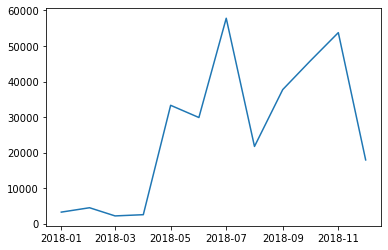

In [12]:
import matplotlib.pyplot as plt

plt.plot(pharamcy_050000)

In [13]:
solution = df

if solution.loc[0,'銷售量']>0:
    print('yes')
#for i in solution.index:
    #print(abs(solution.loc[i,'銷售量'])

yes


In [2]:
solution = df[df.類別代號 != '998\x1c' ]


for i in solution.index:
    if solution.loc[i, '銷售量']<0:
        solution.loc[i, '銷售量'] = abs(solution.loc[i, '銷售量'])
        
solution['銷貨日期'] = pd.to_datetime(solution['銷貨日期'])
solution = solution.set_index('銷貨日期')
solution = solution.groupby('藥品代號')

sale_day = solution.resample('D').sum()

sale_day.head(24)


C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


銷貨次數    序號  銷售金額  原價  折扣率  交易後庫存量   售價  銷售量  銷售額  \
藥品代號           銷貨日期                                                            
             
 2018-01-05  30001  3001   551   0  100       0  0.0    1    0   
               2018-01-06      0     0     0   0    0       0  0.0    0    0   
               2018-01-07      0     0     0   0    0       0  0.0    0    0   
               2018-01-08      0     0     0   0    0       0  0.0    0    0   
               2018-01-09  60004  6004  1752   0  200       0  0.0    2    0   
               2018-01-10      0     0     0   0    0       0  0.0    0    0   
               2018-01-11      0     0     0   0    0       0  0.0    0    0   
               2018-01-12      0     0     0   0    0       0  0.0    0    0   
               2018-01-13      0     0     0   0    0       0  0.0    0    0   
               2018-01-14      0     0     0   0    0       0  0.0    0    0   
               2018-01-15      0     0     0   0    0       0  0.0    0    0   
               2018-01-16      0     0     0   0    0       0  0.0    0    0   
               2018-01-17      0     0     0   0    0       0  0.0    0    0   
               2018-01-18      0     0     0   0    0       0  0.0    0    0   
               2018-01-19      0     0     0   0    0       0  0.0    0    0   
               2018-01-20      0     0     0   0    0       0  0.0    0    0   
               2018-01-21      0     0     0   0    0       0  0.0    0    0   
               2018-01-22      0     0     0   0    0       0  0.0    0    0   
               2018-01-23      0     0     0   0    0       0  0.0    0    0   
               2018-01-24      0     0     0   0    0       0  0.0    0    0   
               2018-01-25      0     0     0   0    0       0  0.0    0    0   
               2018-01-26      0     0     0   0    0       0  0.0    0    0   
               2018-01-27      0     0     0   0    0       0  0.0    0    0   
               2018-01-28      0     0     0   0    0       0  0.0    0    0   

                           折扣金  
藥品代號           銷貨日期             
             
 2018-01-05    0  
               2018-01-06    0  
               2018-01-07    0  
               2018-01-08    0  
               2018-01-09    0  
               2018-01-10    0  
               2018-01-11    0  
               2018-01-12    0  
               2018-01-13    0  
               2018-01-14    0  
               2018-01-15    0  
               2018-01-16    0  
               2018-01-17    0  
               2018-01-18    0  
               2018-01-19    0  
               2018-01-20    0  
               2018-01-21    0  
               2018-01-22    0  
               2018-01-23    0  
               2018-01-24    0  
               2018-01-25    0  
               2018-01-26    0  
               2018-01-27    0  
               2018-01-28    0

In [57]:
date_list_2018=sale_day.xs('050000       \x1c').index.get_level_values('銷貨日期').unique()
sol = pd.DataFrame(index=date_list_2018,columns=['Sales'])

for i in date_list_2018:
    sol.at[i,'Sales'] = sale_day.xs(('050000       \x1c', i)).loc['銷售量']

sol.head(100)

,Sales
銷貨日期,
2018-01-01,169
2018-01-02,0
2018-01-03,0
2018-01-04,0
2018-01-05,100
...,...
2018-04-06,0
2018-04-07,0
2018-04-08,0


C:\Users\MHLAB\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 37559 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MHLAB\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 36008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MHLAB\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MHLAB\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MHLAB\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 37559 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MHLAB\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\back

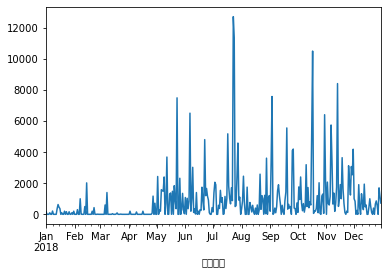

In [58]:
sol['Sales'].plot()

C:\Users\MHLAB\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 37559 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MHLAB\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 36008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MHLAB\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MHLAB\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MHLAB\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 37559 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MHLAB\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\back

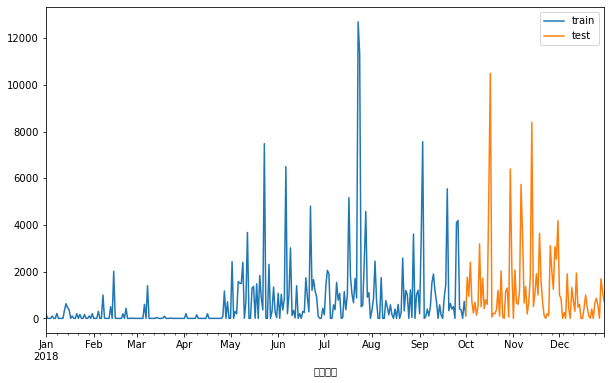

In [59]:
%matplotlib inline 
import matplotlib.pyplot as plt 

#2018-10-01以前做training data 以後做test data
split_date = pd.Timestamp('2018-10-01') 
df_tmp = sol['Sales'] 
train = df_tmp.loc[:split_date] 
test = df_tmp.loc[split_date:] 
plt.figure(figsize=(10, 6)) 
ax = train.plot() 
test.plot(ax=ax) 
plt.legend(['train', 'test']);


In [6]:
import pandas as pd 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import r2_score 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import EarlyStopping 
from keras.optimizers import Adam 
from keras.layers import LSTM


In [7]:
solution = df

for i in solution.index:
    if solution.loc[i, '銷售量']<0:
        solution.loc[i, '銷售量'] = abs(solution.loc[i, '銷售量'])
        
solution['銷貨日期'] = pd.to_datetime(solution['銷貨日期'])
solution = solution.set_index('銷貨日期')
solution = solution.groupby('藥品代號')

C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
#drug = solution.get_group('050000       \x1c')
##################################################### change this line will get differnent drug predict
#drug = solution.get_group('NC033541G0   \x1c') 
drug = solution.get_group('4713930104378\x1c') 
##################################################### 
drug.head()

,銷貨倉,銷貨次數,序號,銷貨時間,銷售金額,客戶代號,性別,藥品代號,藥品名稱,類別代號,說明,等級,原價,折扣率,交易後庫存量,售價,銷售量,銷售額,折扣金,發票
銷貨日期,,,,,,,,,,,,,,,,,,,,
2018-01-03,13,10015,1001,20:11:25,590,0933803280,女,4713930104378,杏輝喉舒樂口含錠2公絲20粒裝 ...,475,喉糖,A,100,90,2,90.0,1,90,0,ˇ
2018-01-04,03,10005,1003,09:56:57,8317,C01,,4713930104378,杏輝喉舒樂口含錠2公絲20粒裝 ...,475,喉糖,A,100,100,6,100.0,1,100,0,
2018-01-04,03,10013,1002,13:40:52,20142,0936095666,女,4713930104378,杏輝喉舒樂口含錠2公絲20粒裝 ...,475,喉糖,A,100,90,5,90.0,1,90,0,
2018-01-05,03,10053,1001,20:44:38,95,0937031969,女,4713930104378,杏輝喉舒樂口含錠2公絲20粒裝 ...,475,喉糖,A,100,95,4,95.0,1,95,0,
2018-01-06,03,10018,1010,12:10:12,2299,C01,,4713930104378,杏輝喉舒樂口含錠2公絲20粒裝 ...,475,喉糖,A,100,100,3,100.0,1,100,0,


In [13]:
#drug_allday will have 2018 all day for index and all column will set to zero
drug_allday = solution.get_group('050000       \x1c')
drug_allday = drug_allday.resample('D').sum()
for col in drug_allday.columns:
     drug_allday[col].values[:] = 0
        
drug_sum = drug.resample('D').sum()

for i in drug_sum.index:
    drug_allday.loc[i,'銷售量'] = drug_sum.loc[i,'銷售量']

drug_allday.head(60)

# drug_sum.head()



,銷貨次數,序號,銷售金額,原價,折扣率,交易後庫存量,售價,銷售量,銷售額,折扣金
銷貨日期,,,,,,,,,,
2018-01-01,0,0,0,0,0,0,0.0,0,0,0
2018-01-02,0,0,0,0,0,0,0.0,0,0,0
2018-01-03,0,0,0,0,0,0,0.0,1,0,0
2018-01-04,0,0,0,0,0,0,0.0,2,0,0
2018-01-05,0,0,0,0,0,0,0.0,1,0,0
2018-01-06,0,0,0,0,0,0,0.0,3,0,0
2018-01-07,0,0,0,0,0,0,0.0,1,0,0
2018-01-08,0,0,0,0,0,0,0.0,0,0,0
2018-01-09,0,0,0,0,0,0,0.0,0,0,0


In [14]:
split_date1 = pd.Timestamp('2018-10-01') 
split_date2 = pd.Timestamp('2018-12-01') 
df_tmp = drug_allday['銷售量'] 
train = df_tmp.loc[:split_date1]
val = df_tmp.loc[split_date1:split_date2]
test = df_tmp.loc[split_date2:]

C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37559 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37559 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\back

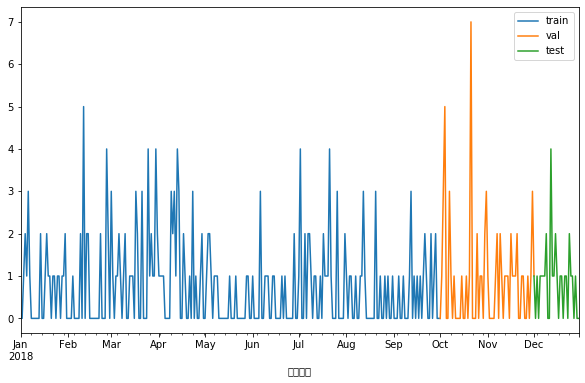

In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6)) 
ax = train.plot() 
ax = val.plot(ax=ax) 
test.plot(ax=ax) 
plt.legend(['train', 'val','test']);

In [16]:
train_tmp=train.values
val_tmp=val.values
test_tmp=test.values

In [17]:
len(train_tmp)

274

In [18]:
def transform_dataset(dataset, look_back=1 , predict_day=1):
    # 前 N 天的銷售量
    dataX = [dataset[i:(i + look_back)]
             for i in range(len(dataset) - look_back - predict_day)]
    # 第 N 天的銷售量
    dataY = [dataset[(i + look_back):(i + look_back + predict_day)]
             for i in range(len(dataset) - look_back - predict_day)]
    return np.array(dataX), np.array(dataY)
look_back = 30
predict_day = 30
trainX, trainY = transform_dataset(train_tmp, look_back, predict_day)
valX,valY = transform_dataset(val_tmp, look_back, predict_day)
testX, testY = transform_dataset(test_tmp, look_back, predict_day)

In [19]:
model = Sequential() 
model.add(Dense(units=16 , activation='relu', input_dim = look_back)) 
model.add(Dense(units=predict_day)) 
model.compile(loss='mse', optimizer='adam') 
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1) 
train_history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop] ,shuffle=False, validation_data=(valX, valY))


Train on 214 samples, validate on 2 samples
Epoch 1/100
214/214 [==============================] - 0s 1ms/step - loss: 1.7129 - val_loss: 1.2222
Epoch 2/100
214/214 [==============================] - 0s 606us/step - loss: 1.3529 - val_loss: 0.9962
Epoch 3/100
214/214 [==============================] - 0s 588us/step - loss: 1.2326 - val_loss: 0.8836
Epoch 4/100
214/214 [==============================] - 0s 587us/step - loss: 1.1711 - val_loss: 0.8124
Epoch 5/100
214/214 [==============================] - 0s 591us/step - loss: 1.1327 - val_loss: 0.7614
Epoch 6/100
214/214 [==============================] - 0s 592us/step - loss: 1.1050 - val_loss: 0.7301
Epoch 7/100
214/214 [==============================] - 0s 594us/step - loss: 1.0828 - val_loss: 0.7081
Epoch 8/100
214/214 [==============================] - 0s 587us/step - loss: 1.0647 - val_loss: 0.6930
Epoch 9/100
214/214 [==============================] - 0s 589us/step - loss: 1.0490 - val_loss: 0.6844
Epoch 10/100
214/214 [=========

214/214 [==============================] - 0s 580us/step - loss: 0.8129 - val_loss: 0.8363
Epoch 80/100
214/214 [==============================] - 0s 599us/step - loss: 0.8115 - val_loss: 0.8746
Epoch 81/100
214/214 [==============================] - 0s 578us/step - loss: 0.8108 - val_loss: 0.8601
Epoch 82/100
214/214 [==============================] - 0s 586us/step - loss: 0.8106 - val_loss: 0.8882
Epoch 83/100
214/214 [==============================] - 0s 575us/step - loss: 0.8094 - val_loss: 0.8764
Epoch 84/100
214/214 [==============================] - 0s 588us/step - loss: 0.8088 - val_loss: 0.8819
Epoch 85/100
214/214 [==============================] - 0s 582us/step - loss: 0.8079 - val_loss: 0.8889
Epoch 86/100
214/214 [==============================] - 0s 583us/step - loss: 0.8082 - val_loss: 0.9143
Epoch 87/100
214/214 [==============================] - 0s 583us/step - loss: 0.8066 - val_loss: 0.9201
Epoch 88/100
214/214 [==============================] - 0s 583us/step - loss:

In [20]:
model.save('stock_DNN_model.h5')

In [21]:
test1 = model.evaluate(valX, valY, batch_size=5)
print("Test Result: ", test1)

2/2 [==============================] - 0s 499us/step
Test Result:  1.1481300592422485


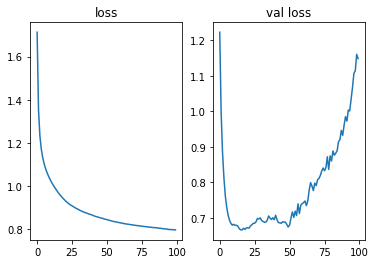

In [22]:
# Visualize
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

plt.subplot(121)
plt.plot(loss)
plt.title("loss")
plt.subplot(122)
plt.plot(val_loss)
plt.title("val loss")
plt.savefig("loss.png",dpi=300)
plt.show()

In [23]:
#predict
from keras.models import load_model
model = load_model('./stock_DNN_model.h5')

split_date3 = pd.Timestamp('2018-11-01') 
split_date4 = pd.Timestamp('2018-11-30') 
predicted = df_tmp.loc[split_date3:split_date4]
predicted = predicted.values


predict = model.predict(np.array([predicted]))
print(predict[0])

[0.8384306  1.0210488  1.5493295  1.1160722  0.6606375  0.3879558
 0.44023228 0.709156   0.5842987  0.6551605  0.65708804 0.7867673
 0.88062435 0.34726343 0.7500297  0.85539234 0.4246535  0.41619268
 0.41135532 0.43477947 0.7345271  0.5624038  0.69988143 0.78617144
 0.6017796  0.4708434  0.5029327  0.3988989  0.21565461 0.2006135 ]


<Figure size 720x432 with 0 Axes>

C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37559 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37559 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\back

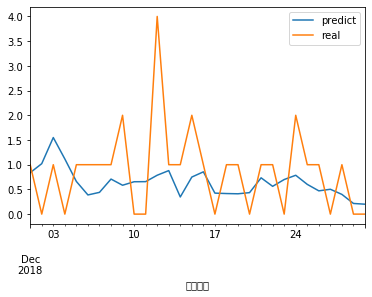

In [24]:
#plt.figure(figsize=(10, 6)) 
#print(test)
#test.plot()
res = pd.DataFrame(columns = ['銷貨日期','sales'])
for i in range(0,30):
    res.loc[i,'sales'] = predict[0][i]
    res.loc[i,'銷貨日期'] = test.index[i]

res= res.set_index('銷貨日期')

plt.figure(figsize=(10, 6)) 
ax = res.plot() 
ax = test.plot(ax=ax)
plt.legend(['predict','real']);
